# Part I - (Ford GoBike System Data )

## Introduction
> Ford GoBike dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

>**Rubric Tip**: Your code should not generate any errors, and should use functions, loops where possible to reduce repetitive code. Prefer to use functions to reuse code statements.

> **Rubric Tip**: Document your approach and findings in markdown cells. Use comments and docstrings in code cells to document the code functionality.

>**Rubric Tip**: Markup cells should have headers and text that organize your thoughts, findings, and what you plan on investigating next.  



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
df_bike = pd.read_csv('201902-fordgobike-tripdata.csv')
df_bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
df_bike.shape

(183412, 16)

In [4]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [5]:
df_bike['member_birth_year'].isnull().value_counts()

False    175147
True       8265
Name: member_birth_year, dtype: int64

In [6]:
#make a copy of dataset.
df_bike_clean = df_bike.copy()

In [7]:
df_bike.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [8]:
##### There are 8265 rows which don't have gender or birth year data. Exclude those rows.
df_bike = df_bike[df_bike['member_gender'].isnull() == False]
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175147 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               175147 non-null int64
start_time                 175147 non-null object
end_time                   175147 non-null object
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     175147 non-null float64
start_station_longitude    175147 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       175147 non-null float64
end_station_longitude      175147 non-null float64
bike_id                    175147 non-null int64
user_type                  175147 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    175147 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.7+ MB


In [9]:
df_bike.member_gender.value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [10]:
df_bike.user_type.value_counts()

Subscriber    158516
Customer       16631
Name: user_type, dtype: int64

In [11]:
# Remove reows that does not have station id
df_bike = df_bike[df_bike['start_station_id'].isnull() == False]
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null object
end_time                   174952 non-null object
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.7+ MB


In [12]:
#Change start_time, end_time to datetime format
df_bike['start_time'] = pd.to_datetime(df_bike['start_time'])
df_bike['end_time'] = pd.to_datetime(df_bike['end_time'])

In [13]:
df_bike[['start_time','end_time']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 2 columns):
start_time    174952 non-null datetime64[ns]
end_time      174952 non-null datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 4.0 MB


## Delete
Drop below cloumns:
<li> start_station_id, start_station_latitude, start_station_longitude </li>
<li> end_station_id, end_station_latitude, end_station_longitude </li>

Above columns won't be very useful as we have start_station_name and end_station_name information.

In [14]:
#df_bike.drop(columns=['start_station_id','start_station_latitude','start_station_longitude','end_station_id','end_station_latitude','end_station_longitude'], inplace = True)

In [15]:
#df_bike.info()

## Delete
Extract year and month from start_time column and make a new column year_month. Also, extract day od week from start_time and create a new column day_of_week

In [16]:
#Extract year_month
#Reference: https://www.interviewqs.com/ddi-code-snippets/extract-month-year-pandas
#df_bike['year_month'] = pd.to_datetime(df_bike['start_time']).dt.to_period('M')

In [17]:
#Extract day_of_week
#reference: https://stackoverflow.com/questions/30222533/create-a-day-of-week-column-in-a-pandas-dataframe-using-python
#df_bike['day_of_week'] = df_bike['start_time'].dt.day_name()

In [18]:
df_bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No


### What is the structure of your dataset?
After preliminary wrangling, the dataset has 174,952 individual bike ride information. The dataset provides information about:
    <li> Trip duration in seconds. </li>
    <li> start/end time and station name for the bike ride.</li>
    <li> Bike id for each ride. </li>
    <li> Bike riders information: birth year, gender, user type. </li>
       
### What is/are the main feature(s) of interest in your dataset?

<li> I am interested in investigating time of the bike ride.</li>
<li> Also I'd like to see riders characteristics (gender, age etc) have any effect on number of rides. </li>

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

start_time, gender, user type, birth year.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


##### Let's start looking at Duration variable.

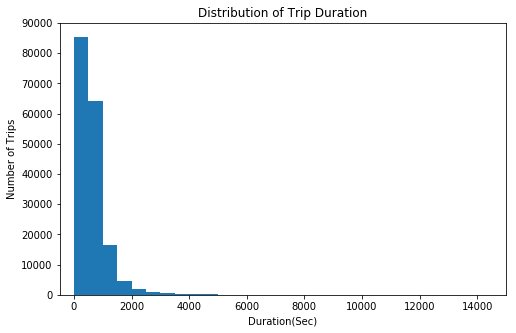

In [19]:
plt.figure(figsize=(8,5))
bins = np.arange(0, df_bike['duration_sec'].max()+500, 500)
plt.hist(data=df_bike, x='duration_sec', bins=bins)
plt.title('Distribution of Trip Duration')
plt.xlabel('Duration(Sec)')
plt.ylabel('Number of Trips')
plt.axis([-500,15000,0,90000]);


In [20]:
# checking summary  of the log for duration
np.log10(df_bike['duration_sec'].describe())

count    5.242919
mean     2.847574
std      3.215427
min      1.785330
25%      2.509203
50%      2.707570
75%      2.897077
max      4.927103
Name: duration_sec, dtype: float64

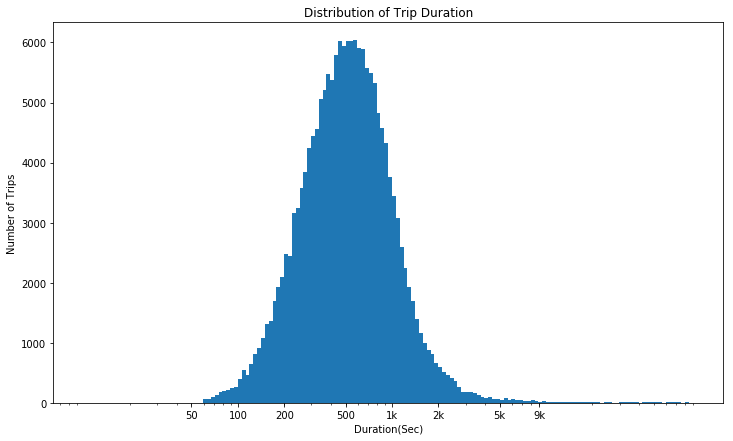

In [21]:
#Above Histogram is right skewed and has long tail. We can use log scale to instead.
log_binsize = 0.025
bins = 10 ** np.arange(1, np.log10(df_bike['duration_sec'].max())+log_binsize, log_binsize)
plt.figure(figsize=(12,7))
plt.hist(data=df_bike, x='duration_sec', bins=bins)
plt.xscale('log')
#plt.xticks([10,50,100,300, 600, 1e3, 2e3, 5e3, 1e4, 2e4], [10,50,100,300,600, '1k', '2k', '5k', '10k', '20k'])
plt.xticks([50, 100, 200, 500, 1e3, 2e3, 5e3, 9e3], [50, 100, 200, 500, '1k', '2k', '5k', '9k'])
plt.title('Distribution of Trip Duration')
plt.xlabel('Duration(Sec)')
plt.ylabel('Number of Trips');

#### When plotted on a log scale, the distribution now looks closer to normal distribution, with pick around 500 seconds.

##### Let's look at member age variable.

In [22]:
# Let's calculate member age from birth year value and add a column to dataset which gives age information.
df_bike['age'] = 2019 - df_bike['member_birth_year']

In [23]:
df_bike['age'] = df_bike['age'].astype(int)
df_bike['member_birth_year'] = df_bike['member_birth_year'].astype(int)

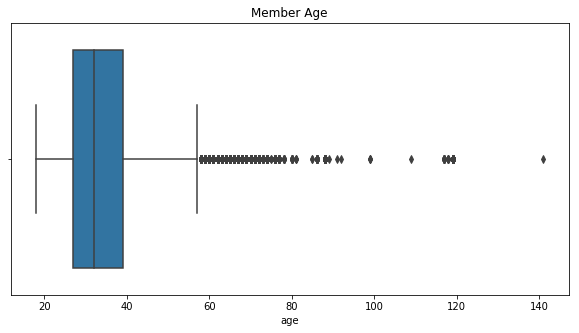

In [24]:
#Plot a boxplot for ordinal variable.
plt.figure(figsize=(10,5))
sb.boxplot(data=df_bike, x='age')
plt.title('Member Age');


In [25]:
# There are some outliers. Let's look at them
df_bike.query('age >= 100')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age
1285,148,2019-02-28 19:29:17.627,2019-02-28 19:31:45.967,158.0,Shattuck Ave at Telegraph Ave,37.833279,-122.263490,173.0,Shattuck Ave at 55th St,37.840364,-122.264488,5391,Subscriber,1900,Male,Yes,119
10827,1315,2019-02-27 19:21:34.436,2019-02-27 19:43:30.008,343.0,Bryant St at 2nd St,37.783172,-122.393572,375.0,Grove St at Masonic Ave,37.774836,-122.446546,6249,Subscriber,1900,Male,No,119
16087,1131,2019-02-27 08:37:36.864,2019-02-27 08:56:28.022,375.0,Grove St at Masonic Ave,37.774836,-122.446546,36.0,Folsom St at 3rd St,37.783830,-122.398870,4968,Subscriber,1900,Male,No,119
19375,641,2019-02-26 17:03:19.855,2019-02-26 17:14:01.619,9.0,Broadway at Battery St,37.798572,-122.400869,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,6164,Customer,1900,Male,No,119
21424,1424,2019-02-26 08:58:02.904,2019-02-26 09:21:47.749,375.0,Grove St at Masonic Ave,37.774836,-122.446546,343.0,Bryant St at 2nd St,37.783172,-122.393572,5344,Subscriber,1900,Male,No,119
21506,701,2019-02-26 09:06:11.239,2019-02-26 09:17:52.442,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,9.0,Broadway at Battery St,37.798572,-122.400869,5337,Customer,1900,Male,No,119
24042,194,2019-02-25 18:58:10.644,2019-02-25 19:01:25.308,158.0,Shattuck Ave at Telegraph Ave,37.833279,-122.263490,173.0,Shattuck Ave at 55th St,37.840364,-122.264488,6363,Subscriber,1900,Male,Yes,119
26133,410,2019-02-25 13:38:12.067,2019-02-25 13:45:02.207,173.0,Shattuck Ave at 55th St,37.840364,-122.264488,176.0,MacArthur BART Station,37.828410,-122.266315,3311,Subscriber,1900,Male,Yes,119
27370,1474,2019-02-25 09:28:42.161,2019-02-25 09:53:17.068,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,386.0,24th St at Bartlett St,37.752105,-122.419724,6436,Customer,1878,Female,No,141
27675,1087,2019-02-25 09:10:39.549,2019-02-25 09:28:46.676,375.0,Grove St at Masonic Ave,37.774836,-122.446546,36.0,Folsom St at 3rd St,37.783830,-122.398870,5250,Subscriber,1900,Male,No,119


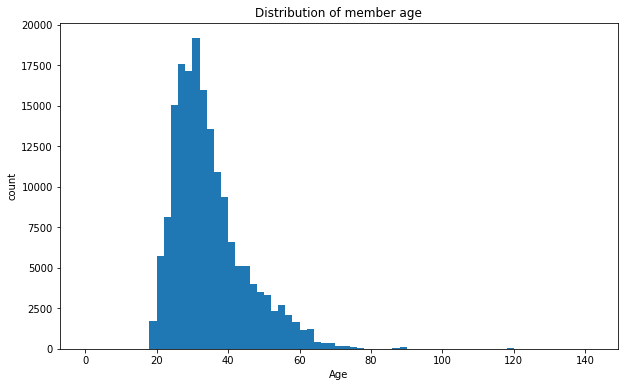

In [26]:
plt.figure(figsize=(10,6))
bins = np.arange(0, df_bike['age'].max()+2, 2)
plt.hist(data=df_bike, x='age', bins = bins)
plt.title('Distribution of member age')
plt.xlabel('Age')
plt.ylabel('count');

#### Age ranges from 20 to 60. There are many bikers around age 30. There are some outliers but those outliers don't cause any significant deviation. So, I'll keep them in dataset now.

##### Now let's look at other categorial variables to explore dataset.

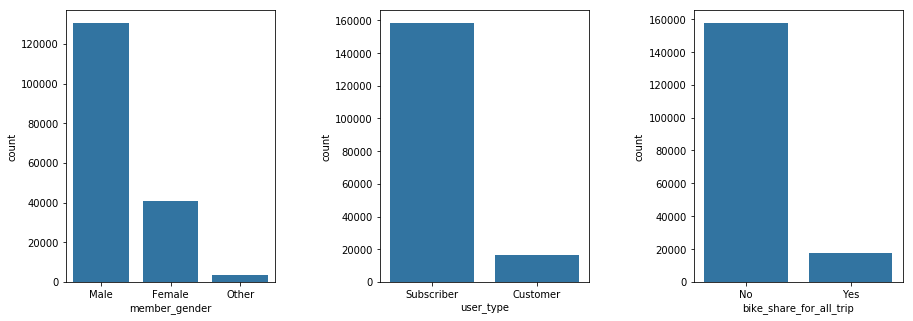

In [27]:
fig, ax = plt.subplots(ncols=3, figsize=[15,5])

fig.subplots_adjust( wspace=0.5)

default_color = sb.color_palette()[0]
#Gender
sb.countplot(data = df_bike, x = 'member_gender', color = default_color, ax = ax[0], order = df_bike['member_gender'].value_counts().index)

#User Type
sb.countplot(data = df_bike, x = 'user_type', color = default_color, ax = ax[1], order = df_bike['user_type'].value_counts().index)

# Bike share
sb.countplot(data = df_bike, x = 'bike_share_for_all_trip', color = default_color, ax = ax[2], order = df_bike['bike_share_for_all_trip'].value_counts().index )

plt.show()


#### The number of subscribers were more than customer and males prefered majority trips. Also most of the members preffered not to share bike rides

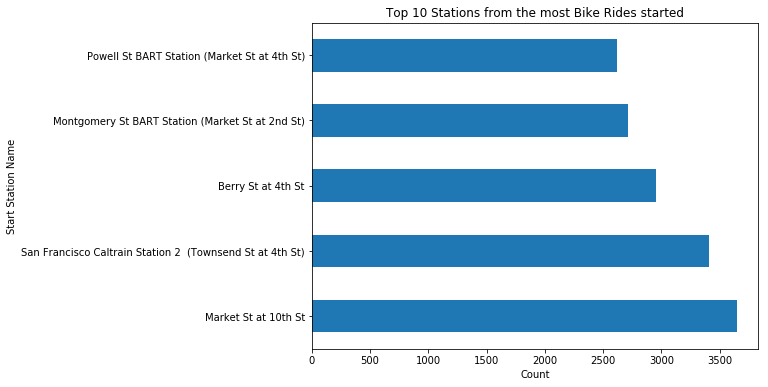

In [28]:
#Find top 5 start stations
#Ref : https://mode.com/python-tutorial/counting-and-plotting-in-python/
plt.figure(figsize=(8,6))

df_bike['start_station_name'].value_counts()[:5].plot(kind='barh', rot=0, color='tab:blue')
plt.xlabel('Count')
plt.ylabel('Start Station Name')
plt.title('Top 10 Stations from the most Bike Rides started');

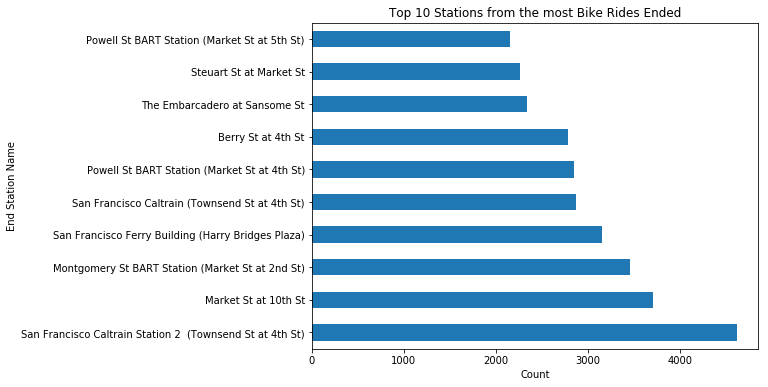

In [29]:
# top 10 end stations
plt.figure(figsize=(8,6))

df_bike['end_station_name'].value_counts()[:10].plot(kind='barh', rot=0, color='tab:blue')
plt.xlabel('Count')
plt.ylabel('End Station Name')
plt.title('Top 10 Stations from the most Bike Rides Ended');

#### Maximum trips were started from Market St at 10th St station. And maximum trips ended at San Francisco Caltrain Station 2

##### Let's check day of week has any effect on number of rides.

In [30]:
# Extract day from start_time.
df_bike['day_of_week'] = df_bike['start_time'].dt.day_name()

In [31]:
df_bike.day_of_week.value_counts()

Thursday     33712
Tuesday      30584
Wednesday    28426
Friday       27663
Monday       25641
Sunday       14512
Saturday     14414
Name: day_of_week, dtype: int64

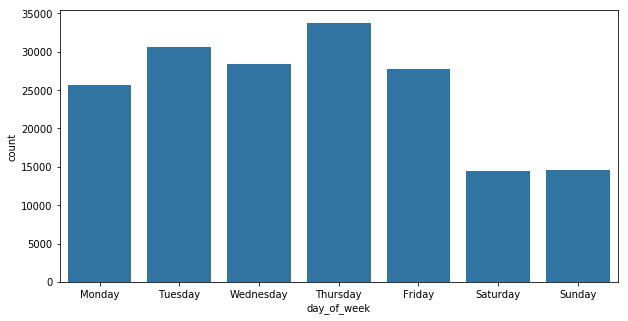

In [32]:
plt.figure(figsize=(10,5))
order = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sb.countplot(data = df_bike, x = 'day_of_week', color = default_color, order = order );

#### Thursday has most number of rides.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The variable duration_sec, looks like right skewed. So, I performed a log transform here. Under the transformations,data looks like unimodel with one peak around 550 seconds.Rides with over 2000 seconds represent only a small portion of the total number of rides.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

<li>For the age distribution, there are riders 100 years above (around 72 riders). Which I think looks like outliers. However, at this point I would like to keep them in the dataset as they are not causing any significant deviation now and I also would like to see other data before cleaning those records.</li>
<li> When considering age of riders - Calculated age by substracting birth year from 2019 (2019 is the year when this data was collected.)</li>
<li> When considering days of the weeks : Extracted week of the day from start_time and created a new column.</li>

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [33]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 18 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null int64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
age                        174952 non-null int64
day_of_week          

In [34]:
all_numeric_vars = ['duration_sec', 'start_time', 'end_time', 'start_station_id', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_latitude',
'end_station_longitude', 'bike_id', 'member_birth_year', 'age']
numeric_vars = ['duration_sec', 'age']
categoric_vars = ['day_of_week', 'member_gender', 'user_type']

##### Let's check relationship between numeric variables duration_sec and age.

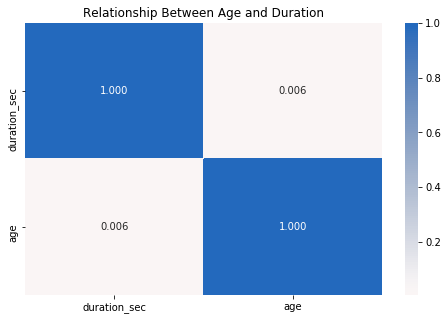

In [35]:
plt.figure(figsize = [8, 5])
sb.heatmap(df_bike[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Relationship Between Age and Duration');

In [36]:
df_bike.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
age                        0
day_of_week                0
dtype: int64

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


ValueError: max must be larger than min in range parameter.

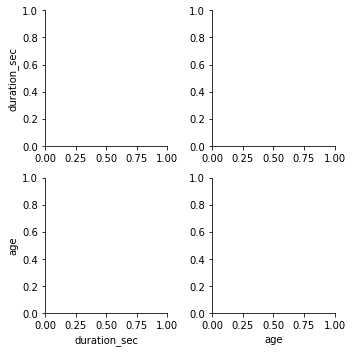

In [39]:
# plot matrix: sample 500 records so that plots are clearer and
# they render faster

samples = np.random.choice(df_bike.shape[0], 10000, replace = False)
samp = df_bike.loc[samples,:]

plt.figure(figsize=[10, 10]);
g = sb.PairGrid(data = samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

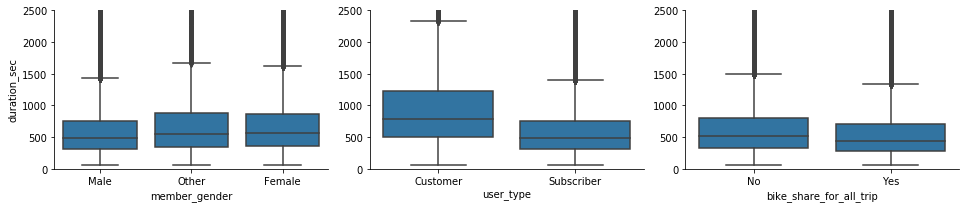

In [38]:
categoric_vars = ['member_gender', 'user_type', 'bike_share_for_all_trip']

def boxgrid(x, y, **kwargs):
    default_color=sb.color_palette()[0]
    sb.boxplot(x, y, color=default_color)

plt.figure(figsize=[10, 10]);
g = sb.PairGrid(data=df_bike, y_vars=['duration_sec'], x_vars=categoric_vars, size=3, aspect=1.5);
g.map(boxgrid)
plt.ylim([0, 2500]);
plt.show();

<li> Female are taking longer trips compared to Male and other gender type.</li>
<li> Similarly, Bikers with user_type 'Customer' bikes longer on average compared to bikers with user_type 'Subscriber'.</li>
<li> people don't prefer to share bike for longer duration trips as well.</li>
    

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

